In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as numpy
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [6]:
#create validation set#0-1범위(/255.0) 실수형으로 전환.#scale input features
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0   
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]  

In [7]:
class_names = ["T-shirt/top", "Trouser", 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

In [8]:
#Multi Layer Perceptron with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

#same
"""
model = keras.models.Sequential([
    model.add(keras.layers.Flatten(input_shape = [28,28])),
    model.add(keras.layers.Dense(300, activation = 'relu')),
    model.add(keras.layers.Dense(100, activation='relu')),
    model.add(keras.layers.Dense(10, activation = 'softmax')), 
])
"""

"\nmodel = keras.models.Sequential([\n    model.add(keras.layers.Flatten(input_shape = [28,28])),\n    model.add(keras.layers.Dense(300, activation = 'relu')),\n    model.add(keras.layers.Dense(100, activation='relu')),\n    model.add(keras.layers.Dense(10, activation = 'softmax')), \n])\n"

In [9]:
#display all the model's layers
#None == batch size can be anything
#automatic name, param = trainable + non-trainable
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
#list of model's layer
model.layers

In [11]:
#fetch a layer by its index
model.layers[1].name

'dense'

In [12]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [13]:
#fetch it by name
model.get_layer('dense').name

'dense'

In [14]:
hidden1 = model.layers[1]

In [15]:
#accessing params of layer
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[-0.05020833, -0.01544045, -0.02091389, ..., -0.05901377,
         0.01578181,  0.03938603],
       [ 0.02636299,  0.05399647,  0.0162381 , ...,  0.03947841,
         0.04511894,  0.01532902],
       [ 0.00883276,  0.02324323, -0.03601824, ..., -0.06408051,
        -0.07009344, -0.04710732],
       ...,
       [-0.02052312, -0.01511219, -0.06964201, ...,  0.03948078,
         0.04632939,  0.04352275],
       [ 0.0701447 ,  0.00553471,  0.0453046 , ..., -0.04937927,
         0.01720127,  0.06040792],
       [ 0.01127066,  0.04003882, -0.04660437, ..., -0.00491694,
         0.01595992, -0.05698701]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
X_train.shape, y_train.shape

((55000, 28, 28), (55000,))

In [21]:
#compiling the model

In [22]:
#to specify loss function, and optimizer, \ 
#also it's able to specify a list of extra metrics to compute during training and evaluation

model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics = ['accuracy'])

In [23]:
#training and evaluating model
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0076 - accuracy: 0.6838 - val_loss: 0.5192 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5037 - accuracy: 0.8252 - val_loss: 0.4541 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4475 - accuracy: 0.8428 - val_loss: 0.4709 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4203 - accuracy: 0.8517 - val_loss: 0.4095 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8595 - val_loss: 0.3836 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3779 - accuracy: 0.8684 - val_loss: 0.3717 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3692 - accuracy: 0.8699 - val_loss: 0.3569 - val_accuracy:

In [24]:
history

In [25]:
model

In [26]:
history.history

{'loss': [0.7204213738441467,
  0.48653215169906616,
  0.4415859282016754,
  0.41473037004470825,
  0.39494216442108154,
  0.38086697459220886,
  0.3668789565563202,
  0.3559306859970093,
  0.3447096347808838,
  0.33573251962661743,
  0.32783883810043335,
  0.31868913769721985,
  0.31181851029396057,
  0.3042938709259033,
  0.29845383763313293,
  0.29210615158081055,
  0.28593772649765015,
  0.2810189723968506,
  0.27553239464759827,
  0.2703395485877991,
  0.2643907070159912,
  0.26058802008628845,
  0.2556581199169159,
  0.25091204047203064,
  0.2477954924106598,
  0.24307599663734436,
  0.2388724386692047,
  0.2350589483976364,
  0.2315223217010498,
  0.22809673845767975],
 'accuracy': [0.7653090953826904,
  0.8310182094573975,
  0.8446909189224243,
  0.8551090955734253,
  0.8615636229515076,
  0.8658363819122314,
  0.870127260684967,
  0.8739818334579468,
  0.8777454495429993,
  0.8797090649604797,
  0.8826909065246582,
  0.8865636587142944,
  0.8881454467773438,
  0.89065456390380

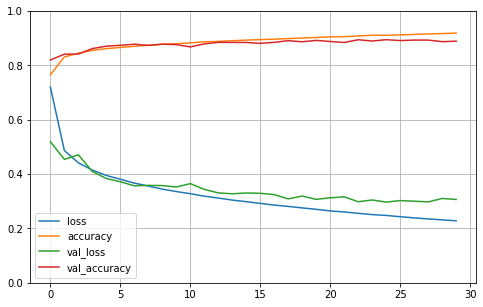

In [27]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test, )

313/313 [==============================] - 1s 2ms/step - loss: 65.9469 - accuracy: 0.8495


[65.94686889648438, 0.8495000004768372]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
import numpy as np
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression Multi layer perceptron using the sequential api

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

#loss val_loss nan 인 이유 --> scaled 된 데이터 셋 사용 안함.

model.compile(loss = 'mean_squared_error', optimizer='sgd')
history = model.fit(X_train_scaled, y_train, epochs= 20, validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test[:3] #pretend these are new instance
X_new = scaler.fit_transform(X_new)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4690 - val_loss: 0.5909
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6731 - val_loss: 0.5712
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5316 - val_loss: 0.4999
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5031 - val_loss: 0.4691
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4682 - val_loss: 0.4500
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4693 - val_loss: 0.4470
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4404 - val_loss: 0.4757
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4372 - val_loss: 0.4904
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4269 - val_loss: 0.5476
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4201 - val_loss: 0.5898

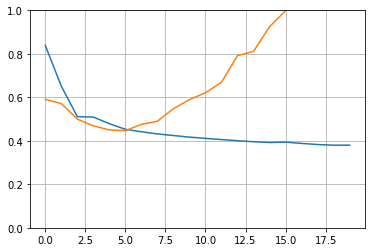

In [34]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
y_pred

array([[6.465535  ],
       [0.25888914],
       [1.9301296 ]], dtype=float32)

# Building Complex Models Using the Functional API

In [36]:
input = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input], outputs=[output])

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [38]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr = 1e-3))
history = model.fit(X_train_scaled, y_train, epochs = 20,
                    validation_data = (X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.0906 - val_loss: 0.7377
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7265 - val_loss: 0.6677
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6732 - val_loss: 0.6259
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6366 - val_loss: 0.5969
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5687 - val_loss: 0.5775
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5989 - val_loss: 0.5609
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5824 - val_loss: 0.5496
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.5384
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5095 - val_loss: 0.5314
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5328 - val_loss: 0.5240

In [39]:
y_pred

array([[3.2134266],
       [1.2124505],
       [1.7546425]], dtype=float32)

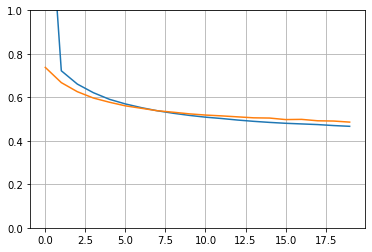

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
#다른 특성을 각 경로에 입력하고 싶을 때, --> multiple input을 사용할 수 있다.

input_A = keras.layers.Input(shape = [5])   # 0~ 4
input_B = keras.layers.Input(shape = [6])   #2 ~ 7
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation= 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_A, input_B], outputs = [output])

In [42]:
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train_scaled[:,:5], X_train_scaled[:,2:]
X_valid_A, X_valid_B = X_valid_scaled[:,:5], X_valid_scaled[:,2:]
X_test_A, X_test_B = X_test_scaled[:,:5], X_test_scaled[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 4.0176 - val_loss: 1.2732
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0603 - val_loss: 0.9004
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8468 - val_loss: 0.7835
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7363 - val_loss: 0.7186
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6919 - val_loss: 0.6742
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6754 - val_loss: 0.6414
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6086 - val_loss: 0.6136
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5814 - val_loss: 0.5920
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5821 - val_loss: 0.5745
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5572 - val_loss: 0.5615

In [43]:
#multiple out
input_A = keras.layers.Input(shape = [5])   # 0~ 4
input_B = keras.layers.Input(shape = [6])   #2 ~ 7
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation= 'relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [44]:
model.compile(loss=['mse', 'mse'], loss_weights = [0.9, 0.1], optimizer ='sgd')

history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs = 20,
                    validation_data = ((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f'totLoss:{total_loss}, mainLoss:{main_loss}, auxLoss:{aux_loss}')

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7870 - dense_13_loss: 1.6606 - dense_14_loss: 2.9246 - val_loss: 0.6173 - val_dense_13_loss: 0.5456 - val_dense_14_loss: 1.2625
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5918 - dense_13_loss: 0.5203 - dense_14_loss: 1.2362 - val_loss: 0.5992 - val_dense_13_loss: 0.5425 - val_dense_14_loss: 1.1096
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5231 - dense_13_loss: 0.4668 - dense_14_loss: 1.0299 - val_loss: 0.6414 - val_dense_13_loss: 0.5924 - val_dense_14_loss: 1.0823
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5262 - dense_13_loss: 0.4831 - dense_14_loss: 0.9146 - val_loss: 0.6678 - val_dense_13_loss: 0.6207 - val_dense_14_loss: 1.0915
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4989 - dense_13_loss: 0.4627 - dense_14_loss: 0.8245 - val_loss: 0.7868 - val_dense_13_loss: 0.7462 - val_de

In [45]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [46]:
y_pred_main, y_pred_aux

(array([[2.8968637],
        [1.0679054],
        [1.017917 ]], dtype=float32),
 array([[2.9335506],
        [1.0199351],
        [1.0105909]], dtype=float32))

# Building Dynamic Models Using Subclassing API

In [47]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs) #handle standard args (예, name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate((input_A, hidden2))
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [48]:
model = WideAndDeepModel()

In [49]:
model.compile(loss = 'mse', loss_weights = (0.9, 0.1), optimizer = 'sgd')
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs = 20,
                    validation_data = ((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f'totLoss:{total_loss}, mainLoss:{main_loss}, auxLoss:{aux_loss}')
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6963 - output_1_loss: 1.5106 - output_2_loss: 3.3678 - val_loss: 0.6003 - val_output_1_loss: 0.5372 - val_output_2_loss: 1.1681
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5770 - output_1_loss: 0.5164 - output_2_loss: 1.1222 - val_loss: 0.5652 - val_output_1_loss: 0.5165 - val_output_2_loss: 1.0036
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5221 - output_1_loss: 0.4798 - output_2_loss: 0.9021 - val_loss: 0.6407 - val_output_1_loss: 0.6073 - val_output_2_loss: 0.9411
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4920 - output_1_loss: 0.4570 - output_2_loss: 0.8069 - val_loss: 0.7323 - val_output_1_loss: 0.7057 - val_output_2_loss: 0.9712
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4709 - output_1_loss: 0.4417 - output_2_loss: 0.7337 - val_loss: 0.8727 - val_output_1_loss: 0.8576 - val_ou

(array([[3.133142 ],
        [0.9607758],
        [0.9471972]], dtype=float32),
 array([[3.0263157],
        [1.1376191],
        [0.7522186]], dtype=float32))

# Saving and Restoring a Model

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [52]:
#functional or sequential model만 가능하다.
#subclass :: Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

model.save('my_keras_model.h5')

In [53]:
model = keras.models.load_model('my_keras_model.h5')

### using CallBacks

 - 콜백 : 다른 코드의 인수로서 넘겨주는 실행가능한 코드
 
 일반적으로 콜백수신 코드로 콜백 코드(함수)를 전달할 때는 콜백 함수의 포인터 (핸들), 서브루틴 또는 람다함수의 형태로 넘겨준다. 콜백수신 코드는 실행하는 동안에 넘겨받은 콜백 코드를 필요에 따라 호출하고 다른 작업을 실행하는 경우도 있다. 다른 방식으로는 콜백수신 코드는 넘겨받은 콜백 함수를 '핸들러'로서 등록하고, 콜백수신 함수의 동작 중 어떠한 반응의 일부로서 나중에 호출할 때 사용할 수도 있다 (비동기 콜백). 콜백은 폴리모피즘과 제네릭프로그래밍의 단순화된 대체 수법이며, 콜백 수신 함수의 정확한 동작은 콜백 함수에 의해 바뀐다. 콜백은 코드 재사용을 할 때 유용하다. 

In [58]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape = [8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [60]:
model.compile(loss='mse', optimizer='sgd')

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')

history = model.fit(X_train_scaled, y_train, epochs = 10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3979
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.3508
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 1.3462
Epoch 4/10
363/363 [==============================] - 0s 931us/step - loss: 1.3484
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 1.3298
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 1.3519
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 1.3157
Epoch 8/10
363/363 [==============================] - 0s 972us/step - loss: 1.3308
Epoch 9/10
363/363 [==============================] - 0s 994us/step - loss: 1.3056
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 1.3006


In [62]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)


history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid), callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7001 - val_loss: 0.4849
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4966 - val_loss: 0.4839
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4557 - val_loss: 0.5633
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4329 - val_loss: 0.6825
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.8220
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4192 - val_loss: 1.2697
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3994 - val_loss: 1.4423
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3954 - val_loss: 1.8994
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3877 - val_loss: 2.1119
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3829 - val_loss: 2.4876

In [ ]:
#model = keras.models.load_model('my_keras_model.h5') #roll back to best model

In [63]:
model.compile(loss='mse', optimizer='sgd')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_valid, y_valid), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3748 - val_loss: 3.0161
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3729 - val_loss: 3.5284
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3773 - val_loss: 3.6232
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3674 - val_loss: 4.4484
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3598 - val_loss: 4.7902
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3563 - val_loss: 5.0305
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3556 - val_loss: 5.2739
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3636 - val_loss: 6.2754
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3560 - val_loss: 6.7611
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3377 - val_lo

In [64]:
#custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

## Visualization Using TensorBoard

In [71]:
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [72]:
run_logdir

'.\\my_logs\\run_2021_02_11-16_32_02'

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [74]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid),
                    callbacks = [tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 3.7915 - val_loss: 0.9083
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8460 - val_loss: 0.6905
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7289 - val_loss: 0.6346
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6815 - val_loss: 0.5976
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6400 - val_loss: 0.5734
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6209 - val_loss: 0.5533
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6018 - val_loss: 0.5362
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5662 - val_loss: 0.5232
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5492 - val_loss: 0.5102
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5439 - val_loss: 0.4979

# Fine-Tuning Neural Network Hyperparameters

In [75]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape":input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu', **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss = 'mse', optimizer = optimizer)
    return model

In [76]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [77]:
keras_reg.fit(X_train, y_train, epochs = 100,
                validation_data = (X_valid, y_valid),
                callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
X_new = X_test[:3]
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.3546 - val_loss: 0.6307
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6739 - val_loss: 0.5464
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6023 - val_loss: 0.5079
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5642 - val_loss: 0.4851
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 0.4640
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5225 - val_loss: 0.4626
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5029 - val_loss: 0.4504
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5011 - val_loss: 0.4437
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4777 - val_loss: 0.4417
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4965 - val_lo

In [78]:
y_pred

array([1.4786232, 3.369394 , 2.7119973], dtype=float32)

In [80]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden' : [0,1,2,3],
    'n_neurons' : np.arange(1,100),      #range -->특수한 범위 객체, arange -> numpy 배열
    "learning_rate" : reciprocal(3e-4, 3e-2),   #A reciprocal continuous random variable :상호 연속 확률 변수
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rnd_search_cv.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

=========] - 0s 2ms/step - loss: 0.6532 - val_loss: 0.6070
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5685
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5506
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5471 - val_loss: 0.5408
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5418 - val_loss: 0.5345
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5271 - val_loss: 0.5313
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5639 - val_loss: 0.5291
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5591 - val_loss: 0.5266
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5504 - val_loss: 0.5253
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5559 - val_loss: 0.5237
Epoch 15/100
242/242 [=====

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001F485F30220>, as the constructor either does not set or modifies parameter learning_rate

- https://github.com/keras-team/keras/issues/13586
- 경고: 위의 셀은 훈련이 끝날 때 에러가 납니다. 이는 최근 사이킷런의 변화때문에 생긴 케라스 이슈 #13586 때문입니다. 이 이슈를 해결하기 위한 풀 리퀘스트 #13598가 있으므로 곧 해결될 것 같습니다.

In [84]:
print(rnd_search_cv.best_params_,'\n',rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_

{'learning_rate': 0.009294506139614786, 'n_hidden': 2, 'n_neurons': 31} 
 -0.40520350138346356


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'